# TUGAS BIG DATA 
Market Basket Analysis
NIM : 1182002002
Nama : Febby Novanti Azhara

Sumber code : https://medium.com/@hafizhan.aliady/market-basket-analysis-acossiation-rule-menggunakan-python-1012f9e1611d
Sumber data : http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

# Import library

In [23]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Membaca Data

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Cleaning Data

In [27]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str') 
df = df[~df['InvoiceNo'].str.contains('C')]

# Membuat Keranjang Belanja Negara Belgium

In [28]:
basket = (df[df['Country'] =="Belgium"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket.head()

Description,12 COLOURED PARTY BALLOONS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 PIECE SPACEBOY COOKIE CUTTER SET,3 TIER CAKE TIN RED AND CREAM,...,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP GINGHAM ROSE,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
537026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539840,0.0,24.0,24.0,24.0,0.0,0.0,12.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Encoding Data Negara Belgium

In [29]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
 
#menghapus kolom postage
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.head()

Description,12 COLOURED PARTY BALLOONS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 PIECE SPACEBOY COOKIE CUTTER SET,3 TIER CAKE TIN RED AND CREAM,...,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP GINGHAM ROSE,WRAP MAGIC FOREST,WRAP MONSTER FUN,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
537026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539840,0,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Membuat frequent items Negara Belgium

In [30]:
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.122449,(ALARM CLOCK BAKELIKE GREEN)
1,0.132653,(ALARM CLOCK BAKELIKE RED)
2,0.102041,(CHARLOTTE BAG APPLES DESIGN)
3,0.112245,(CHILDRENS CUTLERY SPACEBOY)
4,0.102041,(CIRCUS PARADE LUNCH BOX)


# Membuat Rules Negara Belgium

In [31]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.132653,0.122449,0.102041,0.769231,6.282051,0.085798,3.802721
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.122449,0.132653,0.102041,0.833333,6.282051,0.085798,5.204082
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(DOLLY GIRL LUNCH BOX),0.387755,0.234694,0.173469,0.447368,1.906178,0.082466,1.384840
3,(DOLLY GIRL LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.234694,0.387755,0.173469,0.739130,1.906178,0.082466,2.346939
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.234694,0.234694,0.183673,0.782609,3.334594,0.128592,3.520408
5,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.234694,0.234694,0.183673,0.782609,3.334594,0.128592,3.520408
6,(ROUND SNACK BOXES SET OF4 WOODLAND),(LUNCH BAG WOODLAND),0.387755,0.153061,0.132653,0.342105,2.235088,0.073303,1.287347
7,(LUNCH BAG WOODLAND),(ROUND SNACK BOXES SET OF4 WOODLAND),0.153061,0.387755,0.132653,0.866667,2.235088,0.073303,4.591837
8,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.387755,0.224490,0.183673,0.473684,2.110048,0.096626,1.473469
9,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.224490,0.387755,0.183673,0.818182,2.110048,0.096626,3.367347


# Melakukan Sorting Negara Belgium

In [32]:
rules[ (rules['lift'] >= 2) &
        (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.122449,0.132653,0.102041,0.833333,6.282051,0.085798,5.204082
7,(LUNCH BAG WOODLAND),(ROUND SNACK BOXES SET OF4 WOODLAND),0.153061,0.387755,0.132653,0.866667,2.235088,0.073303,4.591837
9,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.224490,0.387755,0.183673,0.818182,2.110048,0.096626,3.367347
15,"(ROUND SNACK BOXES SET OF4 WOODLAND, SPACEBOY ...",(DOLLY GIRL LUNCH BOX),0.153061,0.234694,0.132653,0.866667,3.692754,0.096731,5.739796


# Pivot table LIFT oft Belgium

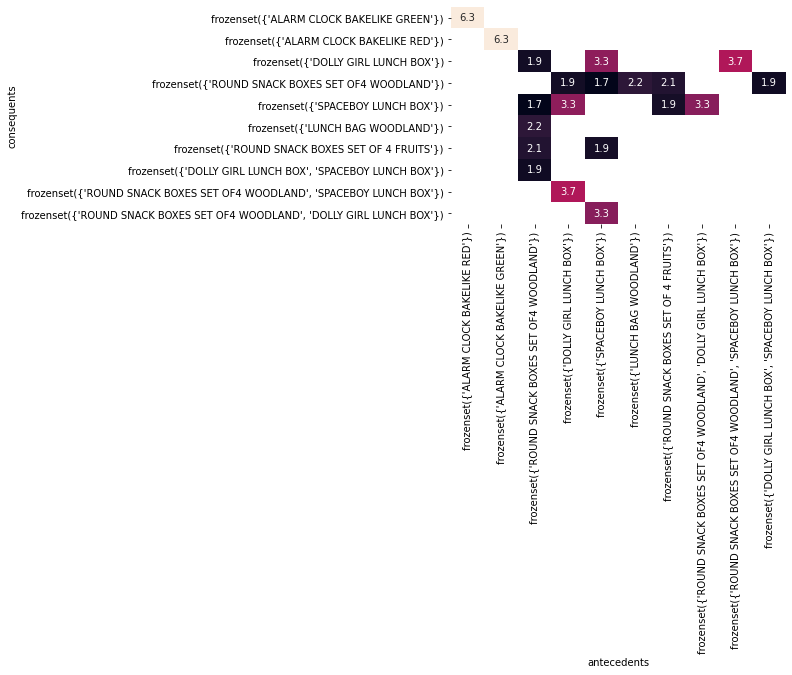

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transform the DataFrame of rules into a matrix using the lift metric

pivot = rules.pivot(index = 'consequents', columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off

sns.heatmap(pivot, annot = True, cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()